In [3]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

!whoami
!date

ndbs
Mon Mar 30 17:34:52 PDT 2020


# 1. Exploring the output and doing spot-check validation on the intervention results

This notebook was copied and modified from Ali's notebook `model_5_vitamin_a_outputs`.

In [28]:
output_dirs = ['/ihme/costeffectiveness/results/vivarium_conic_lsff/v4.0_folic_acid_fortification/ethiopia/2020_03_18_23_04_26/count_data/',
               '/ihme/costeffectiveness/results/vivarium_conic_lsff/v4.0_folic_acid_fortification/india/2020_03_18_23_04_36/count_data/',
              '/ihme/costeffectiveness/results/vivarium_conic_lsff/v4.0_folic_acid_fortification/nigeria/2020_03_18_23_04_42/count_data/']

locations = ['Ethiopia','India','Nigeria']

# india filepath for when results finish
    # '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/india/2020_03_26_21_28_29/count_data/',


In [26]:
# View mortality rates for Ethiopia

index_columns = ['year', 'age_group', 'sex', 'fortification_group',
                 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[0] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[0] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
# data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
#     # note: exclude folic_acid_fortification results here because I tested and 
#     # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                          fortification_group age_group               
baseline                          false               1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  true                1_to_4           18.0   
                                                      early_neonatal   18.0   
                                                      late_neonatal    18.0   
                                                      post_neonatal    18.0   
                                  unknown             1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
folic_acid_fortification_scale_up false               1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  true                1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  unknown             1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   

                                                                              mean  \
scenario                          fortification_group age_group                      
baseline                          false               1_to_4             77.214380   
                                                      early_neonatal  14565.497281   
                                                      late_neonatal    1323.692389   
                                                      post_neonatal     359.196195   
                                  true                1_to_4             35.805543   
                                                      early_neonatal  18388.873211   
                                                      late_neonatal     488.902216   
                                                      post_neonatal     186.563516   
                                  unknown             1_to_4             76.490810   
                                                      early_neonatal  14413.553787   
                                                      late_neonatal    1558.977628   
                                                      post_neonatal     358.664540   
folic_acid_fortification_scale_up false               1_to_4             77.039836   
                                                      early_neonatal  14576.784807   
                                                      late_neonatal    1326.738219   
                                                      post_neonatal     359.022502   
                                  true                1_to_4             77.689476   
                                                      early_neonatal  14387.256103   
                                                      late_neonatal    1294.559674   
                                                      post_neonatal     364.014602   
                                  unknown             1_to_4             76.490810   
                                     

In [29]:
# do the same for India

index_columns = ['year', 'age_group', 'sex', 'fortification_group',
                 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[1] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[1] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
# data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
#     # note: exclude folic_acid_fortification results here because I tested and 
#     # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','fortification_group','input_draw','age_group'],
                    as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                          fortification_group age_group               
baseline                          false               1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  true                1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  unknown             1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
folic_acid_fortification_scale_up false               1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  true                1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  unknown             1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   

                                                                              mean  \
scenario                          fortification_group age_group                      
baseline                          false               1_to_4             29.704963   
                                                      early_neonatal  16598.041878   
                                                      late_neonatal    1263.506396   
                                                      post_neonatal     248.606521   
                                  true                1_to_4             29.220348   
                                                      early_neonatal  16275.718795   
                                                      late_neonatal    1236.034670   
                                                      post_neonatal     247.320097   
                                  unknown             1_to_4             30.152259   
                                                      early_neonatal  16866.280265   
                                                      late_neonatal    1394.896453   
                                                      post_neonatal     248.011553   
folic_acid_fortification_scale_up false               1_to_4             29.719041   
                                                      early_neonatal  16597.991298   
                                                      late_neonatal    1263.006529   
                                                      post_neonatal     248.372359   
                                  true                1_to_4             29.136695   
                                                      early_neonatal  16420.219405   
                                                      late_neonatal    1251.377925   
                                                      post_neonatal     249.686893   
                                  unknown             1_to_4             30.152259   
                                     

In [31]:
# do the same for Nigeria

index_columns = ['year', 'age_group', 'sex', 'fortification_group',
                 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[2] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[1] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
# data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
#     # note: exclude folic_acid_fortification results here because I tested and 
#     # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','fortification_group','input_draw','age_group'],
                    as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                          fortification_group age_group               
baseline                          false               1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  true                1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  unknown             1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
folic_acid_fortification_scale_up false               1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  true                1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   
                                  unknown             1_to_4           25.0   
                                                      early_neonatal   25.0   
                                                      late_neonatal    25.0   
                                                      post_neonatal    25.0   

                                                                              mean  \
scenario                          fortification_group age_group                      
baseline                          false               1_to_4            255.604182   
                                                      early_neonatal  23776.743783   
                                                      late_neonatal    1835.599260   
                                                      post_neonatal     727.248545   
                                  true                1_to_4            343.710503   
                                                      early_neonatal  32396.818739   
                                                      late_neonatal    2515.308052   
                                                      post_neonatal     985.544907   
                                  unknown             1_to_4            231.843626   
                                                      early_neonatal  24778.113221   
                                                      late_neonatal    2285.208416   
                                                      post_neonatal     721.109079   
folic_acid_fortification_scale_up false               1_to_4            211.700076   
                                                      early_neonatal  20646.722181   
                                                      late_neonatal    1595.594594   
                                                      post_neonatal     622.365509   
                                  true                1_to_4            846.722131   
                                                      early_neonatal  50724.109247   
                                                      late_neonatal    3932.691914   
                                                      post_neonatal    1742.574748   
                                  unknown             1_to_4            231.843626   
                                     

## Conclusions from this exploration:

1. Mortality rates are too high in the "covered" group for all age groups (not relevant for 1 to 4 age-groups because they are >6 months old and therefore effectively covered).

2. For ETHIOPIA: The effect of the intervention (effectively covered versus uncovered groups) appears to be much stronger in the baseline scneario than the uncovered scenario. Is there something we are doing incorrectly here that is causing that? I would expect the "time to effect" period to cause the intervention to be slightly less effective than baseline coverage, but it seems to be a very significant difference for the 1-4 age group specifically. for NIGERIA, the opposite problem appears to be the case (mortality rate for uncovered/effetively covered in the vit_a_scale_up >> baseline for the 1-4 age group).

Maybe we implemented our baseline calibration incorrectly??? I think that this model was built before we had the documentation for how to do this in the concept model.

# 2. CALCULATING OUTCOMES AVERTED DUE TO FOLIC ACID FORTIFICATION AND PLOT RESULTS

In [33]:
index_cols = ['year', 'age_group', 'sex', 'cause', 'fortification_group',
        'input_draw', 'scenario']

In [34]:
# load and merge stratified count results for each location, outcome
master_counts = pd.DataFrame()
master_rates = pd.DataFrame()
for i in range(len(output_dirs)):
    yll_count = pd.read_hdf(output_dirs[i] + 'ylls.hdf').rename(
        columns={'value':'ylls'}).drop(columns='measure')
    yld_count = pd.read_hdf(output_dirs[i] + 'ylds.hdf').rename(
        columns={'value':'ylds'}).drop(columns='measure')
    daly_count = yll_count.merge(yld_count, right_on=index_cols, left_on=index_cols)
    daly_count['dalys'] = daly_count['ylls'] + daly_count['ylds']
    deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf').rename(
        columns={'value':'deaths'}).drop(columns='measure')
    data = daly_count.merge(deaths, right_on=index_cols, left_on=index_cols)
    person_time = pd.read_hdf(output_dirs[i] + 'person_time.hdf').rename(
        columns={'value':'person_time'}).drop(columns='measure')
    counts = data.merge(person_time,
                        right_on=['year', 'age_group', 'sex',
                                  'fortification_group',
                                  'input_draw', 'scenario'],
                        left_on=['year', 'age_group', 'sex', 'fortification_group',
                                 'input_draw', 'scenario'])
    counts['location'] = locations[i]
    master_counts = master_counts.append(counts)
master_counts.head()

,year,age_group,sex,cause,fortification_group,input_draw,scenario,ylls,ylds,dalys,deaths,person_time,location
0,2020,1_to_4,female,diarrheal_diseases,false,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
1,2020,1_to_4,female,lower_respiratory_infections,false,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
2,2020,1_to_4,female,measles,false,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
3,2020,1_to_4,female,neural_tube_defects,false,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
4,2020,1_to_4,female,diarrheal_diseases,false,21,folic_acid_fortification_scale_up,0.0,0.0,0.0,0.0,0.0,Ethiopia


In [35]:
# Calculate overall (unstratified results):

overall = master_counts.groupby(['location','scenario','input_draw'], as_index=False).sum()
overall_rates = pd.DataFrame.copy(overall)
for measure in ['ylls','ylds','dalys','deaths','person_time']:
    overall_rates[measure] = overall_rates[measure] / overall_rates['person_time'] * 100_000 
overall_baseline = (overall_rates.where(overall_rates['scenario'] == 'baseline').dropna()
                    .set_index(['location','input_draw']).drop(columns='scenario'))
overall_intervention = (overall_rates.where(overall_rates['scenario'] == 'folic_acid_fortification_scale_up').dropna()
                        .set_index(['location','input_draw']).drop(columns='scenario'))
overall_results = overall_baseline - overall_intervention
overall_results = overall_results.reset_index().drop(columns=['input_draw','person_time']).groupby(['location']).describe(percentiles=[0.025,0.975])
overall_results.head()

ylls                                                    \
         count       mean        std           min          2.5%   
location                                                           
Ethiopia  25.0  14.630433  15.626348  1.164787e+00  1.173524e+00   
India     25.0   0.154785   0.424353 -1.182343e-11 -8.276402e-12   
Nigeria   25.0  23.441085   7.478949  9.583941e+00  1.234298e+01   

                                              ylds            ...      dalys  \
                   50%      97.5%        max count      mean  ...      97.5%   
location                                                      ...              
Ethiopia  7.045418e+00  52.780780  65.417418  25.0  0.179090  ...  53.336306   
India     4.092726e-12   1.280823   1.281323  25.0  0.012482  ...   1.293518   
Nigeria   2.161612e+01  36.232413  39.092079  25.0  0.299912  ...  36.607420   

                    deaths                                                  \
                max  count      mean       std           min          2.5%   
location                                                                     
Ethiopia  66.151885   25.0  0.167430  0.178804  1.332170e-02  1.338425e-02   
India      1.297102   25.0  0.001762  0.004830 -1.350031e-13 -1.008971e-13   
Nigeria   39.377356   25.0  0.268840  0.085915  1.095035e-01  1.413678e-01   

                                            
                   50%     97.5%       max  
location                                    
Ethiopia  8.029930e-02  0.603938  0.747735  
India     5.684342e-14  0.014581  0.014595  
Nigeria   2.471679e-01  0.415525  0.447405  

[3 rows x 32 columns]

In [38]:
# # define function to calculate averted outcomes (dalys, ylds, ylls, deaths) in rate space
# # by specified stratifying variables

# def get_stratified_averted_results(strata_cols):  
#     overall = master_counts.groupby((['location','scenario','input_draw']+strata_cols), as_index=False).sum()
#     overall_rates = pd.DataFrame.copy(overall)
#     overall_rates = overall_rates.where(overall_rates['person_time'] != 0).dropna()
#     for measure in ['ylls','ylds','dalys','deaths','person_time']:
#             overall_rates[measure] = overall_rates[measure] / overall_rates['person_time'] * 100_000
#     overall_baseline = (overall_rates.where(overall_rates['scenario'] == 'baseline').dropna()
#                         .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
#     overall_intervention = (overall_rates.where(overall_rates['scenario'] == 'folic_acid_fortification_scale_up').dropna()
#                             .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
#     overall_results = overall_baseline - overall_intervention
#     overall_results = (overall_results.reset_index()
#                        .drop(columns=['input_draw','person_time']).groupby((['location']+strata_cols))
#                        .describe(percentiles=[0.025,0.975,0.25,0.75]))
#     return overall_results

In [39]:
# define function to calculate averted outcomes (dalys, ylds, ylls, deaths) in rate space
# by specified stratifying variables

def get_stratified_averted_results(strata_cols):  
    overall = master_counts.groupby((['location','scenario','input_draw']+strata_cols), as_index=False).sum()
    overall_rates = pd.DataFrame.copy(overall)
    for measure in ['ylls','ylds','dalys','deaths','person_time']:
            overall_rates[measure] = overall_rates[measure] / overall_rates['person_time'] * 100_000
    overall_baseline = (overall_rates.where(overall_rates['scenario'] == 'baseline').dropna()
                        .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    overall_intervention = (overall_rates.where(overall_rates['scenario'] == 'folic_acid_fortification_scale_up').dropna()
                            .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    merged = overall_baseline.merge(overall_intervention, right_on=(['location','input_draw']+strata_cols),
                                    left_on=(['location','input_draw']+strata_cols), 
                                    suffixes=('_baseline','_intervention'))
    # drop rows where there is zero person time in either the baseline or intervention
    merged = merged.where(merged['person_time_intervention'] != 0).where(merged['person_time_baseline'] != 0).dropna()
    for measure in ['ylls','ylds','dalys','deaths']:
        merged[f'{measure}'] = merged[f'{measure}_baseline'] - merged[f'{measure}_intervention'] 
    merged = (merged.reset_index().groupby((['location']+strata_cols))
                       .describe(percentiles=[0.025,0.975,0.25,0.75]))
    return merged

In [40]:
averted_by_coverage = get_stratified_averted_results(['fortification_group'])
averted_by_coverage['deaths']

# NOTE: results here do not make sense...
    # we would expect to see ~0 averted dalys in the uncovered and covered groups and 
    # POSITIVE dalys averted in the effectively_covered groups
    
# also, note... there are only 10 input draws for "the covered" scenario here because not 

count          mean           std           min  \
location fortification_group                                                    
Ethiopia false                 25.0  3.990885e-01  8.597428e-01 -7.728633e-01   
         true                  18.0 -5.711584e+01  6.282426e+01 -1.315564e+02   
         unknown               25.0 -2.842171e-15  1.025580e-14 -3.552714e-14   
India    false                 25.0  1.339131e+00  3.958378e-01  6.455045e-01   
         true                  25.0 -1.357498e+01  4.102641e+00 -2.022331e+01   
         unknown               25.0 -1.421085e-16  3.474886e-15 -1.065814e-14   
Nigeria  false                 25.0  1.952679e-01  1.611401e+00 -2.956671e+00   
         true                  25.0 -8.685344e-01  6.760933e+00 -1.337250e+01   
         unknown               25.0  7.389644e-15  2.845721e-14 -4.263256e-14   

                                      2.5%         25%        50%  \
location fortification_group                                        
Ethiopia false               -7.510755e-01   -0.058781   0.379173   
         true                -1.313253e+02 -119.683958 -40.021809   
         unknown             -2.700062e-14    0.000000   0.000000   
India    false                6.792395e-01    1.046598   1.383363   
         true                -1.958375e+01  -16.672837 -13.784116   
         unknown             -8.526513e-15    0.000000   0.000000   
Nigeria  false               -2.850629e+00   -0.658709   0.266809   
         true                -1.275650e+01   -3.667461  -2.241680   
         unknown             -3.410605e-14    0.000000   0.000000   

                                       75%         97.5%           max  
location fortification_group                                            
Ethiopia false                7.254033e-01  2.530633e+00  2.829221e+00  
         true                -2.610100e+00  3.644283e+01  4.612477e+01  
         unknown              0.000000e+00  9.947598e-15  1.421085e-14  
India    false                1.582210e+00  2.011962e+00  2.151979e+00  
         true                -1.049124e+01 -5.446108e+00 -4.513143e+00  
         unknown              0.000000e+00  7.105427e-15  7.105427e-15  
Nigeria  false                1.246804e+00  2.721698e+00  2.848897e+00  
         true                 2.037090e+00  1.170307e+01  1.824968e+01  
         unknown              1.421085e-14  7.673862e-14  8.526513e-14

In [41]:
averted_by_year = get_stratified_averted_results(['year'])
averted_by_year['deaths']

count      mean       std           min          2.5%  \
location year                                                          
Ethiopia 2020   25.0  0.064171  0.118788 -8.526513e-14 -3.410605e-14   
         2021   25.0  0.149395  0.159091 -7.105427e-14 -5.400125e-14   
         2022   25.0  0.137483  0.190652  2.842171e-14  6.252776e-14   
         2023   25.0  0.211545  0.246556  5.292315e-07  1.166315e-04   
         2024   25.0  0.218994  0.253309  2.514689e-04  3.449514e-04   
India    2020   25.0  0.000005  0.000016 -8.526513e-14 -6.394885e-14   
         2021   25.0  0.000009  0.000031 -5.684342e-14 -5.258016e-14   
         2022   25.0  0.000010  0.000033 -6.394885e-14 -5.542233e-14   
         2023   25.0  0.002684  0.013370 -6.394885e-14 -5.968559e-14   
         2024   25.0  0.005433  0.018702 -8.526513e-14 -8.100187e-14   
Nigeria  2020   25.0  0.108826  0.102937  2.842171e-14  1.477929e-13   
         2021   25.0  0.237040  0.112202  6.148685e-02  9.834945e-02   
         2022   25.0  0.222613  0.143205  4.248493e-04  3.742415e-02   
         2023   25.0  0.310206  0.158144  6.391662e-02  9.846068e-02   
         2024   25.0  0.380393  0.168921  6.274190e-02  9.813253e-02   

                        25%           50%           75%     97.5%       max  
location year                                                                
Ethiopia 2020  5.684342e-14  1.132139e-06  1.233018e-01  0.370171  0.370243  
         2021  6.111869e-02  6.162041e-02  1.841369e-01  0.550623  0.551171  
         2022  2.120926e-04  6.022508e-02  1.802995e-01  0.590117  0.662055  
         2023  5.927650e-02  1.183883e-01  3.571391e-01  0.782725  0.889947  
         2024  5.949293e-02  1.176789e-01  2.961877e-01  0.787375  1.172774  
India    2020 -7.105427e-15  7.105427e-15  4.263256e-14  0.000058  0.000059  
         2021 -2.842171e-14  0.000000e+00  4.973799e-14  0.000112  0.000116  
         2022 -2.842171e-14  0.000000e+00  1.421085e-14  0.000118  0.000126  
         2023 -7.105427e-15  0.000000e+00  2.131628e-14  0.026822  0.066860  
         2024 -1.421085e-14  2.131628e-14  7.073142e-05  0.067568  0.067593  
Nigeria  2020  4.739151e-06  1.235419e-01  1.239396e-01  0.296849  0.371067  
         2021  1.238759e-01  2.463992e-01  3.075705e-01  0.456292  0.492559  
         2022  1.233575e-01  1.833350e-01  2.458883e-01  0.545710  0.548190  
         2023  1.848824e-01  3.002066e-01  3.637869e-01  0.652821  0.725219  
         2024  2.450840e-01  3.621862e-01  5.366160e-01  0.624072  0.653968

Text(0, 0.5, 'YLLs Averted per 100,000 PY')

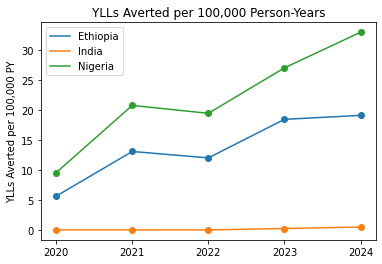

In [42]:
# plot results by year

data = averted_by_year.reset_index()
ethiopia = data.where(data['location'] == 'Ethiopia').dropna()
india = data.where(data['location'] == 'India').dropna()
nigeria = data.where(data['location'] == 'Nigeria').dropna()

plt.scatter(ethiopia['year'], ethiopia['ylls','mean'])
plt.plot(ethiopia['year'], ethiopia['ylls','mean'])

plt.scatter(india['year'], india['ylls','mean'])
plt.plot(india['year'], india['ylls','mean'])

plt.scatter(nigeria['year'], nigeria['ylls','mean'])
plt.plot(nigeria['year'], nigeria['ylls','mean'])

plt.title('YLLs Averted per 100,000 Person-Years')
plt.legend(['Ethiopia','India','Nigeria'])
plt.ylabel('YLLs Averted per 100,000 PY')
# plt.savefig('ethiopia_and_nigeria_by_year.png')

Text(0, 0.5, 'YLLs Averted per 100,000 PY')

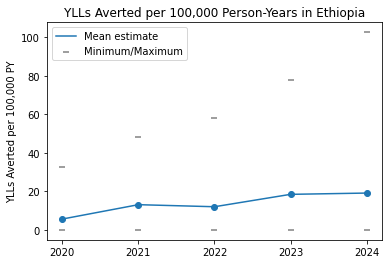

In [43]:
# Ethiopia results by year, with uncertainty (min/max)
data = averted_by_year.reset_index()
data = data.where(data['location'] == 'Ethiopia').dropna()


plt.plot(data['year'], data['ylls','mean'])
plt.scatter(data['year'], data['ylls','min'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','max'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','mean'])

plt.legend(['Mean estimate','Minimum/Maximum'])
plt.title('YLLs Averted per 100,000 Person-Years in Ethiopia')
plt.ylabel('YLLs Averted per 100,000 PY')
# plt.savefig('ethiopia_by_year_with_error.png')

Text(0, 0.5, 'YLLs Averted per 100,000 PY')

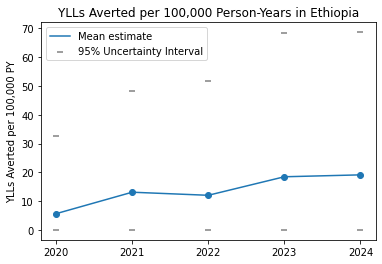

In [52]:
# Ethiopia results by year, with uncertainty (2.5%/97.5%)
data = averted_by_year.reset_index()
data = data.where(data['location'] == 'Ethiopia').dropna()


plt.plot(data['year'], data['ylls','mean'])
plt.scatter(data['year'], data['ylls','2.5%'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','97.5%'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','mean'])

plt.legend(['Mean estimate','95% Uncertainty Interval'])
plt.title('YLLs Averted per 100,000 Person-Years in Ethiopia')
plt.ylabel('YLLs Averted per 100,000 PY')
# plt.savefig('ethiopia_by_year_with_error.png')

Text(0, 0.5, 'YLLs Averted per 100,000 PY')

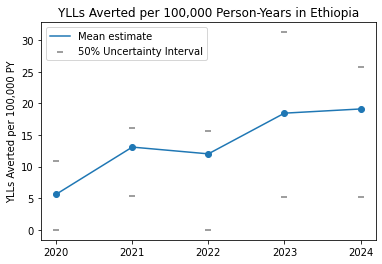

In [47]:
# Ethiopia results by year, with uncertainty (25%/75%)
data = averted_by_year.reset_index()
data = data.where(data['location'] == 'Ethiopia').dropna()


plt.plot(data['year'], data['ylls','mean'])
plt.scatter(data['year'], data['ylls','25%'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','75%'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','mean'])

plt.legend(['Mean estimate','50% Uncertainty Interval'])
plt.title('YLLs Averted per 100,000 Person-Years in Ethiopia')
plt.ylabel('YLLs Averted per 100,000 PY')
# plt.savefig('ethiopia_by_year_with_error.png')

Text(0, 0.5, 'YLLs Averted per 100,000 PY')

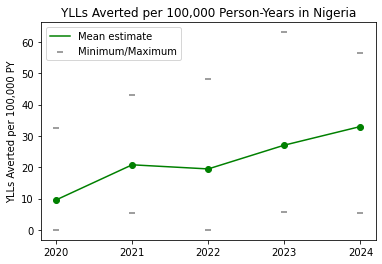

In [46]:
# Nigeria results by year, with uncertainty (min/max)
data = averted_by_year.reset_index()
data = data.where(data['location'] == 'Nigeria').dropna()


plt.plot(data['year'], data['ylls','mean'], c='green')
plt.scatter(data['year'], data['ylls','min'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','max'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','mean'], c='green')

plt.legend(['Mean estimate','Minimum/Maximum'])
plt.title('YLLs Averted per 100,000 Person-Years in Nigeria')
plt.ylabel('YLLs Averted per 100,000 PY')
# plt.savefig('ethiopia_by_year_with_error.png')

Text(0, 0.5, 'YLLs Averted per 100,000 PY')

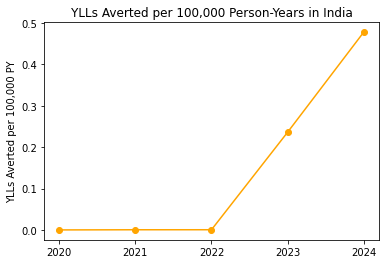

In [49]:
# India results without uncertainty

data = averted_by_year.reset_index()
india = data.where(data['location'] == 'India').dropna()

plt.scatter(india['year'], india['ylls','mean'], c='orange')
plt.plot(india['year'], india['ylls','mean'], c='orange')

plt.title('YLLs Averted per 100,000 Person-Years in India')
plt.ylabel('YLLs Averted per 100,000 PY')
# plt.savefig('ethiopia_by_year.png')

Text(0, 0.5, 'YLLs Averted per 100,000 PY')

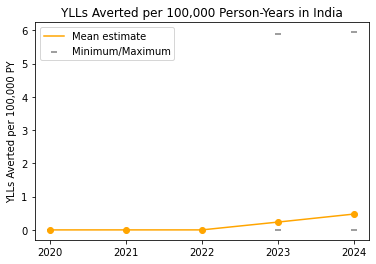

In [51]:
# India results by year, with uncertainty (min/max)
data = averted_by_year.reset_index()
data = data.where(data['location'] == 'India').dropna()


plt.plot(data['year'], data['ylls','mean'], c='orange')
plt.scatter(data['year'], data['ylls','min'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','max'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','mean'], c='orange')

plt.legend(['Mean estimate','Minimum/Maximum'])
plt.title('YLLs Averted per 100,000 Person-Years in India')
plt.ylabel('YLLs Averted per 100,000 PY')
# plt.savefig('ethiopia_by_year_with_error.png')

Text(0, 0.5, 'YLLs Averted per 100,000 PY')

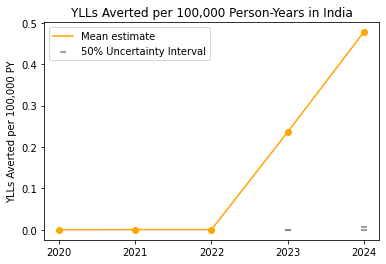

In [61]:
# Ethiopia results by year, with uncertainty (25%/75%)
data = averted_by_year.reset_index()
data = data.where(data['location'] == 'India').dropna()


plt.plot(data['year'], data['ylls','mean'], c='orange')
plt.scatter(data['year'], data['ylls','25%'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','75%'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','mean'], c='orange')

plt.legend(['Mean estimate','50% Uncertainty Interval'])
plt.title('YLLs Averted per 100,000 Person-Years in India')
plt.ylabel('YLLs Averted per 100,000 PY')
# plt.savefig('ethiopia_by_year_with_error.png')

In [53]:
# define plotting function for overall, non-stratified results
# NOTE: spacing will need to be edited when India results are completed

def make_dot_plots(dataset, outcome_var):
    data = pd.DataFrame.copy(dataset) 
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'
        
        
    plt.plot([0.1,0.5],[0,0],'--',c='grey')

    plt.plot([0.2,0.2],[data[outcome_var,'min'][0],data[outcome_var,'max'][0]],c='black')
    plt.plot([0.4,0.4],[data[outcome_var,'min'][1],data[outcome_var,'max'][1]],c='black')
    plt.scatter([0.2,0.4],data[outcome_var,'min'], marker='_',c='black',s=50)
    plt.scatter([0.2,0.4],data[outcome_var,'max'], marker='_',c='black',s=50)

    plt.scatter([0.2,0.4],data[outcome_var,'mean'], s=100)

    plt.xticks([0.2,0.4], data.index)
    if outcome_var == 'deaths':
        plt.title(f'{outcome_name_long} Averted per 100,000 Person-Years')
    else:
        plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')

In [55]:
# define plotting function for overall, non-stratified results
# NOTE: spacing will need to be edited when India results are completed

def make_dot_plots(dataset, outcome_var):
    data = pd.DataFrame.copy(dataset) 
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'
        
        
    plt.plot([0.1,0.7],[0,0],'--',c='grey')

    plt.plot([0.2,0.2],[data[outcome_var,'min'][0],data[outcome_var,'max'][0]],c='black')
    plt.plot([0.4,0.4],[data[outcome_var,'min'][1],data[outcome_var,'max'][1]],c='black')
    plt.plot([0.6,0.6],[data[outcome_var,'min'][2],data[outcome_var,'max'][2]],c='black')
    
    plt.scatter([0.2,0.4,0.6],data[outcome_var,'min'], marker='_',c='black',s=50)
    plt.scatter([0.2,0.4,0.6],data[outcome_var,'max'], marker='_',c='black',s=50)

    plt.scatter([0.2,0.4,0.6],data[outcome_var,'mean'], s=100)

    plt.xticks([0.2,0.4,0.6], data.index)
    if outcome_var == 'deaths':
        plt.title(f'{outcome_name_long} Averted per 100,000 Person-Years')
    else:
        plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')

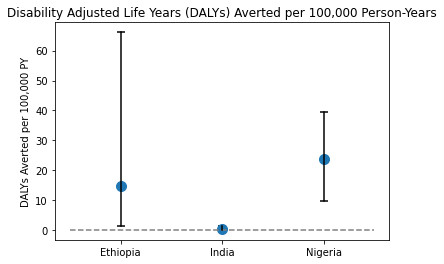

In [56]:
make_dot_plots(overall_results, 'dalys')

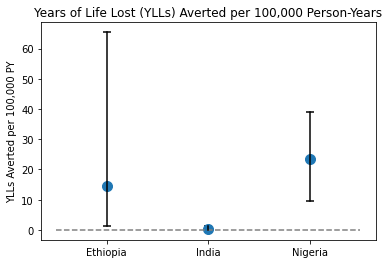

In [57]:
make_dot_plots(overall_results, 'ylls')

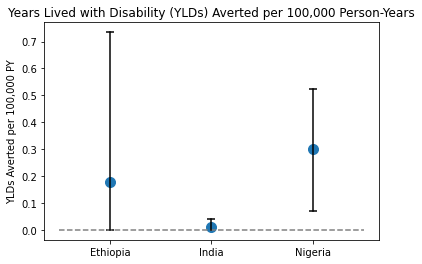

In [58]:
make_dot_plots(overall_results, 'ylds')

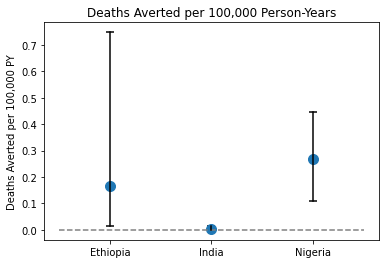

In [59]:
make_dot_plots(overall_results, 'deaths')